<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:20px;" src='alinco.png' width="120"/>
<h1 style="color:#000047;">Actividad 1: Extracción de datos de diferentes fuentes</h1>
<br style="clear:both"/>
</div>

<div style="border-left:4px solid #000047; padding:10px; margin-top:10px; background:#f5f5f5;">
<b>Objetivo:</b> Practicar la extracción, análisis y manipulación de datos provenientes de archivos JSON, XML, CSV e imágenes usando Python.
</div>

<div style="margin-top:10px;">
<b>Instrucciones generales:</b>
<ul>
<li>Lee cuidadosamente cada sección y realiza los ejercicios propuestos.</li>
<li>Utiliza <b>pandas</b> para manipulación de datos tabulares, <b>json</b> y <b>xml.etree.ElementTree</b> para extracción de datos, y <b>matplotlib</b> o <b>opencv</b> para imágenes.</li>
<li>Responde cada pregunta con código y, cuando sea necesario, justifica tu respuesta.</li>
</ul>
</div>

## 1️⃣ JSON: Información de empleados

Supón que tienes el archivo <code>empleados.json</code> con la siguiente estructura:

```json
[
  {"nombre": "Ana", "edad": 28, "departamento": "Ventas", "salario": 2500},
  {"nombre": "Luis", "edad": 35, "departamento": "IT", "salario": 3200},
  {"nombre": "María", "edad": 24, "departamento": "Ventas", "salario": 2300},
  {"nombre": "Carlos", "edad": 40, "departamento": "IT", "salario": 4000}
]
```

<b>Ejercicios:</b>

1. Crea un DataFrame a partir de la extracción de información de este archivo JSON.
2. ¿Cuál es el <b>salario promedio por departamento</b>?
3. ¿Quién es el <b>empleado más joven</b> y a qué departamento pertenece?
4. ¿Cuántos empleados tienen un <b>salario mayor a 2500</b>?
5. ¿Cuál es la <b>diferencia de edad</b> entre el empleado más joven y el de mayor edad?
6. ¿Cuál es el <b>salario total pagado</b> en la empresa?

<i>Tip: Usa pandas.read_json o json.load para cargar los datos.</i>

In [5]:
import json
import pandas as pd
from pandas import json_normalize

In [2]:
# Tu código aquí
with open('empleados.json') as jsonfile:
    jsonEmpleados = json.load(jsonfile)

In [6]:
# 1. Crear un DataFrame
dfEmpleados = pd.DataFrame(jsonEmpleados)
dfEmpleados

,nombre,edad,departamento,salario
0,Ana,28,Ventas,2500
1,Luis,35,IT,3200
2,MarÃ­a,24,Ventas,2300
3,Carlos,40,IT,4000


In [7]:
# 2. ¿Cuál es el salario promedio por departamento?
sal_prom_dep = dfEmpleados.groupby('departamento')['salario'].mean()
sal_prom_dep

departamento
IT        3600.0
Ventas    2400.0
Name: salario, dtype: float64

In [11]:
# 3. ¿Quién es el empleado más joven y a qué departamento pertenece?
emp_menor_indice = dfEmpleados['edad'].idxmin()
emp_menor = dfEmpleados.loc[emp_menor_indice]
emp_menor

nombre          MarÃ­a
edad                24
departamento    Ventas
salario           2300
Name: 2, dtype: object

In [13]:
# 4. ¿Cuántos empleados tienen un salario mayor a 2500?

emp_mayor_2500 = dfEmpleados['salario'] > 2500
emp_mayor = dfEmpleados.loc[emp_mayor_2500]
emp_mayor

,nombre,edad,departamento,salario
1,Luis,35,IT,3200
3,Carlos,40,IT,4000


In [17]:
# 5. ¿Cuál es la diferencia de edad entre el empleado más joven y el de mayor edad?

edad_menor = dfEmpleados['edad'].min()
edad_mayor = dfEmpleados['edad'].max()
diff_edad = edad_mayor - edad_menor
print(f"La diferencia entre el empleado mas joven y el de mayor edad es {diff_edad} años.")

La diferencia entre el empleado mas joven y el de mayor edad es 16 años.


In [18]:
# 6. ¿Cuál es el salario total pagado en la empresa?
salario_total = dfEmpleados['salario'].sum()
print(f"El salario total pagado por la empresa es {salario_total}")

El salario total pagado por la empresa es 12000


## 2️⃣ XML: Catálogo de libros

Supón que tienes el archivo <code>libros.xml</code> con la siguiente estructura:

```xml
<libros>
  <libro>
    <titulo>Python para Todos</titulo>
    <autor>Juan Pérez</autor>
    <precio>29.99</precio>
    <anio>2020</anio>
  </libro>
  <libro>
    <titulo>Data Science Avanzado</titulo>
    <autor>María López</autor>
    <precio>45.50</precio>
    <anio>2022</anio>
  </libro>
  <libro>
    <titulo>Ingeniería de Características</titulo>
    <autor>Pedro Ruiz</autor>
    <precio>39.00</precio>
    <anio>2019</anio>
  </libro>
</libros>
```

<b>Ejercicios:</b>

1. Crea un DataFrame a partir de la extracción de información de este archivo XML.
2. ¿Cuál es el <b>libro más caro</b> y su autor?
3. ¿Cuál es el <b>precio promedio</b> de los libros publicados después de 2020?
4. ¿Cuántos libros fueron <b>publicados antes de 2021</b>?
5. ¿Cuál es la <b>diferencia de precio</b> entre el libro más barato y el más caro?
6. ¿Cuántos <b>autores diferentes</b> hay en la lista?

<i>Tip: Usa xml.etree.ElementTree para leer el archivo y pandas para tabular los datos.</i>

In [22]:
import xml.etree.ElementTree as ET
import json
import pandas as pd

In [25]:
# Tu código aquí
libros = ET.parse('libros.xml')
raiz=libros.getroot()
raiz

<Element 'libros' at 0x0000027A310545E0>

In [36]:
# Recorremos los datos
lista_libros = []

for libro_node in raiz.findall('libro'):

    lista_libros.append(
        {
            'titulo': libro_node.find('titulo').text,
            'autor': libro_node.find('autor').text,
            'precio': libro_node.find('precio').text,
            'anio': libro_node.find('anio').text
        }
    )

lista_libros

[{'titulo': 'Python para Todos',
  'autor': 'Juan Pérez',
  'precio': '29.99',
  'anio': '2020'},
 {'titulo': 'Data Science Avanzado',
  'autor': 'María López',
  'precio': '45.50',
  'anio': '2022'},
 {'titulo': 'Ingeniería de Características',
  'autor': 'Pedro Ruiz',
  'precio': '39.00',
  'anio': '2019'}]

In [37]:
# 1. Crear un DataFrame de los libros
dfLibros = pd.DataFrame(lista_libros)
dfLibros

,titulo,autor,precio,anio
0,Python para Todos,Juan Pérez,29.99,2020
1,Data Science Avanzado,María López,45.50,2022
2,Ingeniería de Características,Pedro Ruiz,39.00,2019


In [47]:
# 2. ¿Cuál es el libro más caro y su autor?

libro_caro_indice = dfLibros['precio'].idxmax()
libro_caro = dfLibros.loc[libro_caro_indice]
print(f"El libro más caro es '{libro_caro['titulo']}' y es del autor '{libro_caro['autor']}'")

El libro más caro es 'Data Science Avanzado' y es del autor 'María López'


In [59]:
# 3. ¿Cuál es el precio promedio de los libros publicados después de 2020?
libros_recientes = dfLibros[pd.to_numeric(dfLibros['anio']) > 2020]
precio_promedio = pd.to_numeric(libros_recientes['precio']).mean()  
print(f"El precio promedio de los libros despues del 2020 es: ${precio_promedio:.2f}")

El precio promedio de los libros despues del 2020 es: $45.50


In [64]:
# 4. ¿Cuántos libros fueron publicados antes de 2021?
total_viejitos = dfLibros[pd.to_numeric(dfLibros['anio']) < 2021]
print(f"Antes del 2021 fueron publicados {len(total_viejitos)} libros.")

Antes del 2021 fueron publicados 2 libros.


In [78]:
# 5. ¿Cuál es la diferencia de precio entre el libro más barato y el más caro?

precio_menor = dfLibros['precio'].astype(float).min()
precio_mayor = dfLibros['precio'].astype(float).max()
print(f"La diferencia entre el precio menor y el precio mayor en los libros publicados es de ${precio_mayor - precio_menor:.2f}.")

La diferencia entre el precio menor y el precio mayor en los libros publicados es de $15.51.


In [81]:
# 6. ¿Cuántos autores diferentes hay en la lista?
autores = dfLibros['autor'].unique()
print(f"En la lista de libros publicados se encuentran {len(autores)} autores únicos.")

En la lista de libros publicados se encuentran 3 autores únicos.


## 3️⃣ CSV: Ventas detalladas

Supón que tienes el archivo <code>ventas_detalladas.csv</code> con la siguiente estructura:

```csv
producto,fecha,cantidad,precio_unitario
A,2023-01-01,10,2.5
B,2023-01-02,5,3.0
A,2023-01-03,7,2.5
C,2023-01-01,3,4.0
B,2023-01-03,2,3.0
```

<b>Ejercicios:</b>

1. Crea un DataFrame con los datos extraídos del archivo.
2. ¿Cuál es el <b>total vendido</b> por producto y por fecha?
3. ¿En qué fecha se vendió la <b>mayor cantidad de productos</b>?
4. ¿Cuál es el <b>producto con mayor ingreso total</b>?
5. ¿Cuál es la <b>media de cantidad vendida</b> por producto?
6. ¿Qué producto tuvo <b>ventas todos los días registrados</b>?

<i>Tip: Usa pandas.read_csv y agrupa los datos según lo que se pide.</i>

In [149]:
# Tu código aquí
# 1. DataFrame de las ventas
dfVentas = pd.read_csv('ventas_detalladas.csv')
dfVentas

,Unnamed: 0,producto,fecha,cantidad,precio_unitario
0,0,A,01/01/2023,10,2.5
1,1,B,02/01/2023,5,3.0
2,2,A,03/01/2023,7,2.5
3,3,C,01/01/2023,3,4.0
4,4,B,03/01/2023,2,3.0
5,5,A,02/01/2023,6,2.0


In [119]:
# 2. ¿Cuál es el total vendido por producto y por fecha?

dfVentas['total_venta'] = dfVentas['cantidad'] * dfVentas['precio_unitario']
tot_ventas = dfVentas.groupby(['producto','fecha'])['total_venta'].sum()
tot_ventas

producto  fecha     
A         01/01/2023    25.0
          02/01/2023    12.0
          03/01/2023    17.5
B         02/01/2023    15.0
          03/01/2023     6.0
C         01/01/2023    12.0
Name: total_venta, dtype: float64

In [121]:
# 3. ¿En qué fecha se vendió la mayor cantidad de productos?

ventas_por_fecha = dfVentas.groupby('fecha')['cantidad'].sum()
fecha_max_ventas = ventas_por_fecha.idxmax()
cantidad_maxima = ventas_por_fecha.max()
print(f"La fecha con mayor ventas fue en {fecha_max_ventas} con un total de {cantidad_maxima} productos.")


La fecha con mayor ventas fue en 01/01/2023 con un total de 13 productos.


In [122]:
# 4. ¿Cuál es el producto con mayor ingreso total?
dfVentas['total_venta'] = dfVentas['cantidad'] * dfVentas['precio_unitario']
producto_mas_ingreso = dfVentas.groupby('producto')['total_venta'].sum()
producto = producto_mas_ingreso.idxmax()
ingreso = producto_mas_ingreso.max()
print(f"El producto con mayor ingreso fue el producto: '{producto}' con un total de ${ingreso:.2f} pesos.")


El producto con mayor ingreso fue el producto: 'A' con un total de $54.50 pesos.


In [123]:
# 5. ¿Cuál es la media de cantidad vendida por producto?
venta_media = dfVentas.groupby('producto')['cantidad'].sum()
print(f"La venta média por prodcuto es de: {venta_media.mean()} unidades.")

La venta média por prodcuto es de: 11.0 unidades.


In [129]:
# 6. ¿Qué producto tuvo ventas todos los días registrados?

dias_unicos = dfVentas['fecha'].nunique()
dias_ventas_x_prod = dfVentas.groupby('producto')['fecha'].nunique()
prod_ventas_diarias = dias_ventas_x_prod[dias_ventas_x_prod == dias_unicos]

if prod_ventas_diarias.empty:
    print("No se encontró ningún producto con ventas diarias.")
else:
    print("Estos son los productos con ventas registradas todos los días")
    print(prod_ventas_diarias)


Estos son los productos con ventas registradas todos los días
producto
A    3
Name: fecha, dtype: int64


## 4️⃣ Imágenes: Análisis de pixeles

Supón que tienes la imagen <code>alinco.png</code> en la misma carpeta que este notebook.

<b>Ejercicios:</b>

1. Extrae la información de los pixeles de la imagen y muestra sus dimensiones.
2. ¿Cuál es el <b>valor RGB</b> del píxel (50, 50)?
3. ¿Cuál es el <b>color predominante</b> en la imagen?

<i>Tip: Usa matplotlib.pyplot.imread o cv2.imread para cargar la imagen y numpy para analizar los datos.</i>

In [130]:
# 1. Tu código aquí

import numpy as np
import matplotlib.pyplot as plt

I = plt.imread('alinco.png')
I.shape

(110, 120, 4)

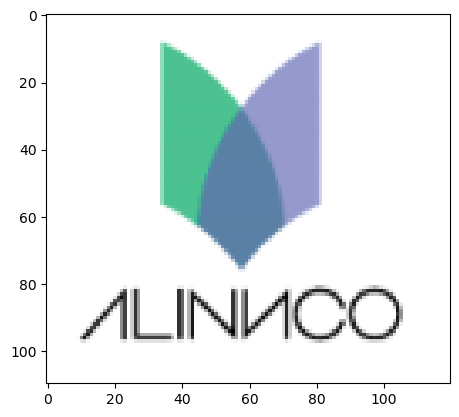

In [131]:
# Mostrar imagen
plt.imshow(I)

In [137]:
# 2. ¿Cuál es el valor RGB del píxel (50, 50)?
x = 50
y = 50
valor_pixel = I[x, y]
rgb_valor = (valor_pixel * 255).astype(int) # Lo conventimos a un rango de 0 a 255

print(f"\nValor RGB (Rojo, Verde, Azul):")
print(f"R: {rgb_valor[0]}, G: {rgb_valor[1]}, B: {rgb_valor[2]}")


Valor RGB (Rojo, Verde, Azul):
R: 89, G: 128, B: 165


In [148]:
# 3. ¿Cuál es el color predominante en la imagen?

# Usaremos kmeans para identificar grupos de colores
from sklearn.cluster import KMeans

if I.dtype != np.uint8:
    datos_imagen = (I * 255).astype(np.uint8) # Lo conventimos a un rango de 0 a 255

#Creamos lista de todos los pixeles de la imagen
pixel_datos = datos_imagen.reshape(-1, datos_imagen.shape[2])

# De acuerdo a la imagen definimos 5 clusters de colores
num_clusters = 5 

# Iniciamos el modelos K-Means
kmeans = KMeans(n_clusters = num_clusters, random_state = 42, n_init = 'auto')
kmeans.fit(pixel_datos)

# Obtenemos los colores centroides
colores_principales = kmeans.cluster_centers_.astype(int)

# Contamos datos de cada color
conteo_colores = np.unique(kmeans.labels_, return_counts=True)
conteo_pixeles = conteo_colores[1]

# Encontrar el índice del cluster con el conteo más alto
indice_predominante = np.argmax(conteo_pixeles)

# Obtener el valor RGB del cluster predominante
rgb_predominante = colores_principales[indice_predominante]

print("Color predominante en la imagen ")
print("------------------------------- ")
print(f"Total de píxeles en la imagen: {len(pixel_data)}")
print(f"El color predominante es el RGB: {({rgb_predominante[0]}, {rgb_predominante[1]}, {rgb_predominante[2]})}")
print(f"\nNota: Efectivamente el color blanco es el predominante")

Color predominante en la imagen 
------------------------------- 
Total de píxeles en la imagen: 13200
El color predominante es el RGB: ({0}, {0}, {0})

Nota: Efectivamente el color blanco es el predominante
